In [ ]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
#import joblib

In [3]:
 #Charger les données
train_df = pd.read_csv("../data/processed/train.csv")
test_df = pd.read_csv("../data/processed/test.csv")

# Supposons que la colonne cible est "price"
target_column = "price"

# Séparer les features et la cible
X_train = train_df.drop(columns=[target_column])
y_train = train_df[target_column]

X_test = test_df.drop(columns=[target_column])
y_test = test_df[target_column]

# Vérification
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (4600, 16)
y_train shape: (4600,)


In [5]:
y_test.head(5)

0     313000.0
1    2384000.0
2     342000.0
3     420000.0
4     550000.0
Name: price, dtype: float64

In [6]:
numerical_transformers = Pipeline(steps=[
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler())
])

In [7]:
categorical_tranformers = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), 
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [8]:
preprocessing = ColumnTransformer([
    ('num_transformers', numerical_transformers, make_column_selector(dtype_include=np.number)),
    ('cat_transformers', categorical_tranformers, make_column_selector(dtype_exclude=np.number))
])

In [9]:
model = Pipeline(steps=[
    ('preprocessing', preprocessing), 
    ('knn',LinearRegression())
])

In [10]:
model

,steps,"[('preprocessing', ...), ('knn', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num_transformers', ...), ('cat_transformers', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [11]:
model.fit(X_train, y_train)

,steps,"[('preprocessing', ...), ('knn', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num_transformers', ...), ('cat_transformers', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [12]:
model.score(X_test, y_test)

0.9997441368358417

In [14]:
y_pred = model.predict(X_test)

In [15]:
# Calcul des métriques
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Affichage
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 score:", r2)

MAE: 1160.3548020064495
MSE: 81323666.05408219
RMSE: 9017.96352033441
R2 score: 0.9997441368358417


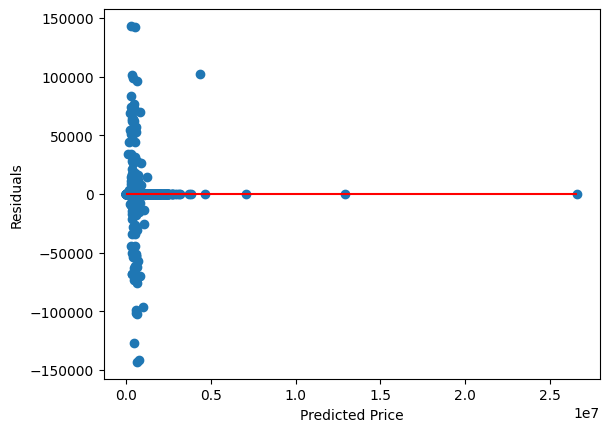

In [16]:
import matplotlib.pyplot as plt
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.hlines(0, min(y_pred), max(y_pred), colors='red')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.show()

In [24]:
def reg_to_class(price):
    if price < 100000:
        return "bas"
    elif price < 300000:
        return "moyen"
    else:
        return "élevé"

In [26]:
y_test_class = y_test.apply(reg_to_class)
y_pred_class = pd.Series(y_pred).apply(reg_to_class)

print(classification_report(y_test_class, y_pred_class))

              precision    recall  f1-score   support

         bas       0.97      1.00      0.98        58
       moyen       0.97      0.99      0.98       882
       élevé       1.00      0.99      1.00      3660

    accuracy                           0.99      4600
   macro avg       0.98      1.00      0.99      4600
weighted avg       0.99      0.99      0.99      4600

